<a href="https://colab.research.google.com/github/BrajanNieto/Tareas_Programacion101_BrajanNieto/blob/main/90_Examen4_Brajan_Nieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica 04 - Programación 101**
## Maestría de Ciencia de Datos e Inteligencia Artificial
### Programación 101

**Profesor del curso:**  
Mg. John Caballero Terrazos  
[jcaballero@utec.edu.pe](mailto:jcaballero@utec.edu.pe)

**Maestrante:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

In [1]:
# Librerías que se usaron en el desarrollo de la práctica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm #Esto lo use a para imputación de valores =0 en glucosa y BIM ya que fueron las unicas varibales que se trabajaron en las demás preguntas

## Pregunta 1

1) Carga diabetes.csv en un DataFrame df_diabetes.

In [2]:
#Carga de datos utilizando pandas.
df_diabetes = pd.read_csv('diabetes.csv')

2) Muestra las 5 primeras filas.

In [3]:
#Utilizo head() para imprimir las primeras 5 lineas.
print("Las primeras 5 filas del DataFrame: \n")
print(df_diabetes.head())


Las primeras 5 filas del DataFrame: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Imprimo para conocer propiedades básicas
print("\nDescripción del DF:\n")
print(df_diabetes.describe())


Descripción del DF:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

3) Imprime el número total de filas, columnas y el tipo de cada columna.

In [5]:
#Utilizo shape para asignar los valores a las variables filas y columnas
filas, columnas = df_diabetes.shape
print(f"\nNúmero total de filas: {filas}")
print(f"Número total de columnas: {columnas}\n")

#Imprimo los tipos de datos por cada columna
print("Tipos de datos de cada columna:")
print(df_diabetes.dtypes)


Número total de filas: 768
Número total de columnas: 9

Tipos de datos de cada columna:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


4) Convierte la columna Outcome a tipo categórico y verifica el cambio imprimiendo la información del DataFrame (df_diabetes.info()).

In [6]:
#Se observó anteriormente que Outcome es de tipo "int64", hacemos el cambio:
df_diabetes['Outcome'] = df_diabetes['Outcome'].astype('category')
#Imprimimos para corroborar
print("\nInformación del DataFrame después de convertir 'Outcome' a categórico:")
print(df_diabetes.info())
#Tambien analizamos los valores nulos por columna por si tenemos que imputar algo.


Información del DataFrame después de convertir 'Outcome' a categórico:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None


**Realizaremos la imputación a outliers para las variables BMI**:
Dado que en la pregunta **2**  se solicita categorizar el BMI yse observa que hay valores imposibles para la naturaleza de esta variable, debemos corregir estos valores. Según la bibliografía revisada, es improbable encontrar valores de BMI menores a 15, ya que estos son incompatibles con la vida sin soporte médico externo. Por otro lado, aunque no existe un límite superior definido para el BMI, se han registrado valores de hasta 100. Sin embargo, en la base de datos, el valor máximo registrado es de 67.1.


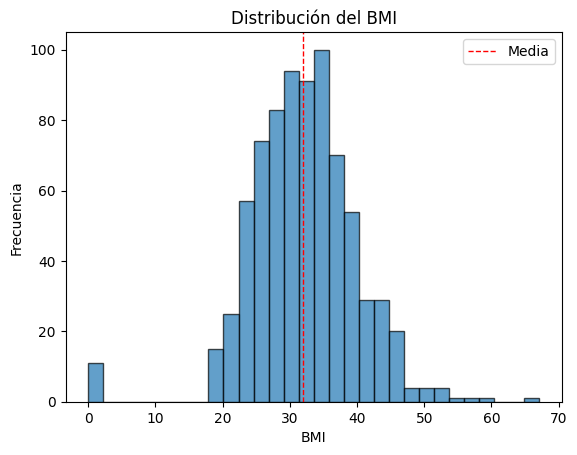

In [7]:
# Inspección visual de la columna BMI. Se observa que sigue una distribución simetrica
# Como se mencionó presenta una cota inferior por la naturaleza del BMI pero existen valores = 0
plt.hist(df_diabetes['BMI'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución del BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.axvline(df_diabetes['BMI'].mean(), color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()

In [8]:
# Realizar la prueba KS contra una distribución normal
stat, p_value = kstest(df_diabetes['BMI'], 'norm', args=(df_diabetes['BMI'].mean(), df_diabetes['BMI'].std()))

# Mostrar resultados
#print(f"KS Statistic: {stat}")
print(f"P-Value: {p_value}")
# Decisión basada en el p-valor
if p_value > 0.05:
    print("No se rechaza H0: Los datos siguen una distribución normal, imputamos por media.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal, imputamos por mediana.")

P-Value: 0.051691155132081446
No se rechaza H0: Los datos siguen una distribución normal, imputamos por media.


In [9]:
# Reemplazamos los valores menores a 15 por la media calculada
df_diabetes.loc[df_diabetes['BMI'] < 15, 'BMI'] = df_diabetes.loc[df_diabetes['BMI'] >= 15, 'BMI'].mean()

# Mostramos el resultado para comprobar la imputación realizada
print("Valores menores a 15 imputados con la media:")
print(df_diabetes['BMI'].describe())


Valores menores a 15 imputados con la media:
count    768.000000
mean      32.457464
std        6.875151
min       18.200000
25%       27.500000
50%       32.400000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


**Realizaremos la imputación a outliers para las variables Glucose**:
Dado que en la pregunta **4**  se solicita categorizar y hallar promedio de BIM y Glucose yse observa que hay valores imposibles para la naturaleza de esta variable, debemos corregir estos valores. Según la bibliografía revisada, es improbable encontrar valores de Glucose menores a 50, ya que estos son incompatibles con la vida sin soporte médico externo.

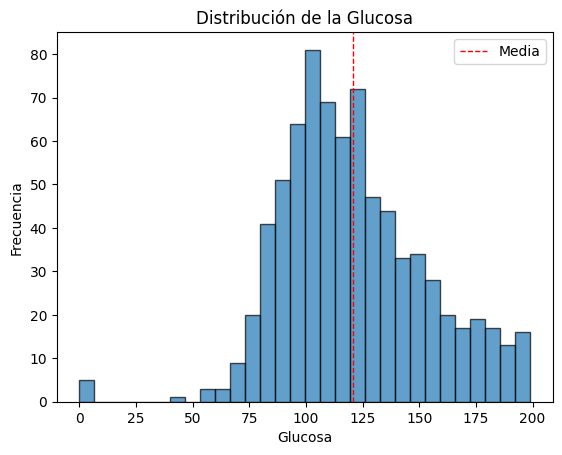

In [10]:
# Inspección visual de la columna Glucose. Se observa que sigue una distribución simetrica
plt.hist(df_diabetes['Glucose'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de la Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.axvline(df_diabetes['Glucose'].mean(), color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()

In [11]:
# Realizar la prueba KS contra una distribución normal
stat_g, p_value_g = kstest(df_diabetes['Glucose'], 'norm', args=(df_diabetes['Glucose'].mean(), df_diabetes['Glucose'].std()))

# Mostrar resultados
#print(f"KS Statistic: {stat_g}")
print(f"P-Value: {p_value_g}")

# Decisión basada en el p-valor
if p_value_g > 0.05:
    print("No se rechaza H0: Los datos siguen una distribución normal, imputamos por media.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución normal, imputamos por mediana.")


P-Value: 0.003536428524350968
Se rechaza H0: Los datos no siguen una distribución normal, imputamos por mediana.


In [12]:
# Reemplazamos los valores  por la mediana
df_diabetes.loc[df_diabetes['Glucose'] < 25, 'Glucose'] = df_diabetes.loc[df_diabetes['Glucose'] >= 25, 'Glucose'].median()

# Mostramos el resultado para comprobar la imputación realizada
print("Valores menores a 35 imputados con la mediana:")
print(df_diabetes['Glucose'].describe())


Valores menores a 35 imputados con la mediana:
count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


## Pregunta 2


1) Crea un DataFrame df_filtrado con todas las filas de df_diabetes donde Glucose > 120.

In [13]:
# Se crea el DF filtrado
df_filtrado = df_diabetes[df_diabetes['Glucose'] > 120].copy()

# Compruebo imprimiendo las 5 primeras lineas
print("Las primeras 5 filas del DataFrame Filtrado: \n")
print(df_filtrado.head())

# Imprimo para conocer propiedades
print("\nDescripción del DF filtrado:\n")
print(df_filtrado.describe())

Las primeras 5 filas del DataFrame Filtrado: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6      148             72             35        0  33.600000   
2            8      183             64              0        0  23.300000   
4            0      137             40             35      168  43.100000   
8            2      197             70             45      543  30.500000   
9            8      125             96              0        0  32.457464   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
2                     0.672   32       1  
4                     2.288   33       1  
8                     0.158   53       1  
9                     0.232   54       1  

Descripción del DF filtrado:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   349.000000  349.000000     349.000000     349.000000  349.000000   
mean      4.309456  148.601719      72.601719    

2) Agrega a df_filtrado una columna BMI_Category que clasifique el BMI así:
*   "Bajo" si BMI < 18.5
*   "Normal" si 18.5 ≤ BMI < 25
*   "Sobrepeso" si 25 ≤ BMI < 30
*   "Obeso" si BMI ≥ 30

In [14]:
# Creamos una lista de condiciones para generar la categorización del BMI.
# Si no hubiésemos realizado la imputación previamente, todos los datos menores a 15
# habrían sido categorizados como "bajo", lo que podría resultar erróneo.
# Dado que la base de datos contiene menos de 800 filas, se optó por corregir estos errores
# en lugar de eliminarlos.

conditions = [
    (df_filtrado['BMI'] < 18.5),
    (df_filtrado['BMI'] >= 18.5) & (df_filtrado['BMI'] < 25),
    (df_filtrado['BMI'] >= 25) & (df_filtrado['BMI'] < 30),
    (df_filtrado['BMI'] >= 30)
]

choices = ['Bajo', 'Normal', 'Sobrepeso', 'Obeso']
df_filtrado['BMI_Category'] = np.select(conditions, choices, default='Desconocido')

3) Muestra las primeras 5 filas de df_filtrado con la nueva columna incluida.

In [15]:
#Imprimo las 5 primeras filas usando head
print("Las primeras 5 filas de df_filtrado con la columna BMI_Category:")
print(df_filtrado.head())

Las primeras 5 filas de df_filtrado con la columna BMI_Category:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6      148             72             35        0  33.600000   
2            8      183             64              0        0  23.300000   
4            0      137             40             35      168  43.100000   
8            2      197             70             45      543  30.500000   
9            8      125             96              0        0  32.457464   

   DiabetesPedigreeFunction  Age Outcome BMI_Category  
0                     0.627   50       1        Obeso  
2                     0.672   32       1       Normal  
4                     2.288   33       1        Obeso  
8                     0.158   53       1        Obeso  
9                     0.232   54       1        Obeso  


## Pregunta 3

1) Carga age_groups.csv en un DataFrame df_age_groups.

In [16]:
#Carga de datos utilizando pandas.
df_age_groups = pd.read_csv('age_groups.csv')

2) Haz un merge de df_diabetes con df_age_groups por la columna Age. El resultado se llamará df_combinado. Debe ser un left merge para mantener todas las filas de df_diabetes.

In [17]:
# Verificar si hay valores nulos en la columna 'Age' en ambos DataFrames
print("\nValores nulos en la columna 'Age':")
print(f"df_diabetes: {df_diabetes['Age'].isnull().sum()} nulos")
print(f"df_age_groups: {df_age_groups['Age'].isnull().sum()} nulos")

# Verificar tamaños de los DataFrames
print("\nTamaños de los DataFrames antes del merge:")
print(f"df_diabetes: {df_diabetes.shape}")
print(f"df_age_groups: {df_age_groups.shape}")


Valores nulos en la columna 'Age':
df_diabetes: 0 nulos
df_age_groups: 0 nulos

Tamaños de los DataFrames antes del merge:
df_diabetes: (768, 9)
df_age_groups: (52, 2)


In [18]:
# Realizar el merge (left join)
df_combinado = pd.merge(df_diabetes, df_age_groups, on='Age', how='left')
# Verificar el tamaño del DataFrame combinado
print("Tamaño de df_combinado después del merge:")
print(df_combinado.shape)

Tamaño de df_combinado después del merge:
(768, 10)


3) Muestra las 5 primeras filas de df_combinado para verificar que la columna AgeGroup se haya agregado correctamente.

In [19]:
#Imprimo las 5 primeras filas usando head
print("Las primeras 5 filas de df_combinado")
print(df_combinado.head())
#Se comprueba que se realizó el merge correctamente

Las primeras 5 filas de df_combinado
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome AgeGroup  
0                     0.627   50       1   Adulto  
1                     0.351   31       0   Adulto  
2                     0.672   32       1   Adulto  
3                     0.167   21       0    Joven  
4                     2.288   33       1   Adulto  


## Pregunta 4

1) Agrupa df_combinado por AgeGroup.

In [20]:
# Agrupar por 'AgeGroup' y calcular el promedio de 'Glucose' y 'BMI'
df_Agrupado = df_combinado.groupby('AgeGroup').agg(
    avg_glucose=('Glucose', 'mean'),
    avg_bmi=('BMI', 'mean')
).reset_index()

print("Las primeras 5 filas de df_Agrupado")
print(df_Agrupado.head())

Las primeras 5 filas de df_Agrupado
       AgeGroup  avg_glucose    avg_bmi
0        Adulto   126.503704  33.562593
1  Adulto_Mayor   139.679012  31.012530
2         Joven   115.016787  32.022583


2) Calcula el promedio de Glucose y el promedio de BMI para cada grupo de edad.

In [21]:
# Como los valores ya están calculados imprimimos son un for para las filas
for _, row in df_Agrupado.iterrows():
    print(
        f"Para el grupo de edad {row['AgeGroup']}, el promedio de glucosa es {row['avg_glucose']:.2f} y de BMI es {row['avg_bmi']:.2f}."
    )

Para el grupo de edad Adulto, el promedio de glucosa es 126.50 y de BMI es 33.56.
Para el grupo de edad Adulto_Mayor, el promedio de glucosa es 139.68 y de BMI es 31.01.
Para el grupo de edad Joven, el promedio de glucosa es 115.02 y de BMI es 32.02.


3) Ordena el resultado por el promedio de Glucose de mayor a menor.

In [22]:
# Ordenamos por el promedio de 'Glucose' de mayor a menor
df_sorted = df_Agrupado.sort_values(by='avg_glucose', ascending=False)
print("Las primeras 5 filas de df_Sorted")
print(df_sorted.head())

Las primeras 5 filas de df_Sorted
       AgeGroup  avg_glucose    avg_bmi
1  Adulto_Mayor   139.679012  31.012530
0        Adulto   126.503704  33.562593
2         Joven   115.016787  32.022583


4) Muestra el DataFrame resultante.

In [23]:
print("Mostramos DF sorted")
print(df_sorted)

Mostramos DF sorted
       AgeGroup  avg_glucose    avg_bmi
1  Adulto_Mayor   139.679012  31.012530
0        Adulto   126.503704  33.562593
2         Joven   115.016787  32.022583


##Pregunta 5:

1) A partir de df_combinado, filtra las filas donde AgeGroup = "Adulto" y Outcome = 1 (casos positivos de diabetes en adultos).

In [24]:
# Filtramos filas donde AgeGroup = "Adulto" y Outcome = 1
df_subset = df_combinado[(df_combinado['AgeGroup'] == "Adulto") & (df_combinado['Outcome'] == 1)]
#Iprimo el tamaño del subset
print(df_subset.shape)

(140, 10)


2) De este subconjunto, selecciona los 5 registros con el mayor valor de BMI.

In [25]:
# Seleccionamos los 5 registros con el mayor valor de BMI
top_bmi = df_subset.nlargest(5, 'BMI')
print(top_bmi)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
193           11      135              0              0        0  52.3   
155            7      152             88             44        0  50.0   
99             1      122             90             51      220  49.7   
84             5      137            108              0        0  48.8   
378            4      156             75              0        0  48.3   

     DiabetesPedigreeFunction  Age Outcome AgeGroup  
193                     0.578   40       1   Adulto  
155                     0.337   36       1   Adulto  
99                      0.325   31       1   Adulto  
84                      0.227   37       1   Adulto  
378                     0.238   32       1   Adulto  


3) Muestra únicamente las columnas Age, Glucose, BMI, DiabetesPedigreeFunction, ordenadas por BMI de mayor a menor.

In [26]:
# Seleccionamos las columnas y ordenar por BMI de mayor a menor
top_bmi_sorted = top_bmi[['Age', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].sort_values(by='BMI', ascending=False)

# Mostramos el resultado
print("\nTop 5 registros con el mayor BMI (casos positivos de diabetes en adultos):")
print(top_bmi_sorted )


Top 5 registros con el mayor BMI (casos positivos de diabetes en adultos):
     Age  Glucose   BMI  DiabetesPedigreeFunction
193   40      135  52.3                     0.578
155   36      152  50.0                     0.337
99    31      122  49.7                     0.325
84    37      137  48.8                     0.227
378   32      156  48.3                     0.238


## Pregunta 6:

1) Usando df_combinado, crea una tabla pivote que tenga:
* Índice: AgeGroup
* Columnas: Outcome
* Valores: promedio de Glucose y BMI

In [27]:
# Crear una tabla pivote con el promedio de Glucose y BMI
pivot_table = df_combinado.pivot_table(
    index='AgeGroup',
    columns='Outcome',
    values=['Glucose', 'BMI'],
    aggfunc='mean'
)

<ipython-input-27-25d67e46311f>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_combinado.pivot_table(


2) La pivot table debe mostrar el promedio de Glucose y BMI por combinación de AgeGroup y Outcome.

In [28]:
# Mostrar la tabla pivote
print("\nTabla pivote (promedio de Glucose y BMI por AgeGroup y Outcome):")
print(pivot_table)


Tabla pivote (promedio de Glucose y BMI por AgeGroup y Outcome):
                    BMI                Glucose            
Outcome               0          1           0           1
AgeGroup                                                  
Adulto        31.923077  35.085000  111.830769  140.128571
Adulto_Mayor  29.168778  33.098881  127.209302  153.789474
Joven         30.703241  36.816194  108.051988  140.322222


3) De la tabla resultante, filtra y muestra únicamente las filas (AgeGroups) donde el promedio de BMI para cualquiera de los valores de Outcome sea mayor a 30.

In [29]:
#Filtrar las filas donde el promedio de BMI para cualquier Outcome sea mayor a 30
filtered_pivot_table = pivot_table[pivot_table['BMI'].apply(lambda x: x.max() > 30, axis=1)]

# Mostrar la tabla filtrada
print("\nFilas donde el promedio de BMI para cualquier Outcome es mayor a 30:")
print(filtered_pivot_table)


Filas donde el promedio de BMI para cualquier Outcome es mayor a 30:
                    BMI                Glucose            
Outcome               0          1           0           1
AgeGroup                                                  
Adulto        31.923077  35.085000  111.830769  140.128571
Adulto_Mayor  29.168778  33.098881  127.209302  153.789474
Joven         30.703241  36.816194  108.051988  140.322222
